<img src="https://imgur.com/3Ua9VYU.png" style="float: left; margin: 18px; height: 75px"> 

## *Modeling & Accuracy of Models*
---

## Import Libraries
--- 

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Reading in Data
---

In [79]:
bbandpl=pd.read_csv('../dataset/bbandpl.csv')
bbandpl.head()

,subreddit,body
0,bodybuilding,Lmao so classic is basically open now
1,bodybuilding,No one had a coach up until late 90s. Seems li...
2,bodybuilding,Let’s all agree with enough and some. 1st plac...
3,bodybuilding,58 now 59 at Christmas
4,bodybuilding,Where is the cheapest iso100 fruity pebbles? I...


## Data Prep
---

In [80]:
bbandpl['subreddit']=bbandpl['subreddit'].map({'bodybuilding':1,'powerlifting':0})

In [81]:
#features and target
X=bbandpl['body']
y=bbandpl['subreddit']

In [82]:
#split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

## Modeling
---

In [83]:
#baseline accuracy
y.value_counts(normalize = True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

### *CountVectorizer with LogisticRegression*
---

In [84]:
#setting up pipeline
pipe_cvec_lr = Pipeline([('cvec', CountVectorizer()),('lr', LogisticRegression())])

#setting up parameters
pipe_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'lr__penalty': ['l1','l2',None]
    }

#instantiate GridSearchCV
gs_cvec_lr = GridSearchCV(pipe_cvec_lr,param_grid = pipe_cvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_cvec_lr.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'lr__penalty': ['l1', 'l2', None]})

In [113]:
print(f'The best score for the best model is :{gs_cvec_lr.best_score_}')
print(f'The best parameters for the best model is :{gs_cvec_lr.best_params_}')
print(f'The train data score is:{gs_cvec_lr.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_lr.score(X_test,y_test)}')

The best score for the best model is :0.7886666666666667
The best parameters for the best model is :{'cvec__max_df': 0.9, 'cvec__max_features': 4000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'lr__penalty': 'l2'}
The train data score is:0.9653333333333334
The test data score is:0.814


### *CountVectorizer with KNeighbors*
---

In [106]:
#setting up pipeline
pipe_cvec_knn = Pipeline([('cvec', CountVectorizer()),('knn', KNeighborsClassifier())])

#setting up parameters
pipe_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'knn__n_neighbors':[3,5,7],
    'knn__weights':['distance','uniform']
    }

#instantiate GridSearchCV
gs_cvec_knn = GridSearchCV(pipe_cvec_knn,param_grid = pipe_cvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_cvec_knn.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['distance', 'uniform']})

In [114]:
print(f'The best score for the best model is :{gs_cvec_knn.best_score_}')
print(f'The best parameters for the best model is :{gs_cvec_knn.best_params_}')
print(f'The train data score is:{gs_cvec_knn.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_knn.score(X_test,y_test)}')

The best score for the best model is :0.6053333333333333
The best parameters for the best model is :{'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
The train data score is:0.9966666666666667
The test data score is:0.602


### *CountVectorizer with MultinomialNB*
---

In [86]:
#setting up pipeline
pipe_cvec_nb = Pipeline([('cvec', CountVectorizer()),('nb', MultinomialNB())])

#setting up parameters
pipe_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95]
    }

#instantiate GridSearchCV
gs_cvec_nb = GridSearchCV(pipe_cvec_nb,param_grid = pipe_cvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_cvec_nb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english']})

In [115]:
print(f'The best score for the best model is :{gs_cvec_nb.best_score_}')
print(f'The best parameters for the best model is :{gs_cvec_nb.best_params_}')
print(f'The train data score is:{gs_cvec_nb.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_nb.score(X_test,y_test)}')

The best score for the best model is :0.7893333333333334
The best parameters for the best model is :{'cvec__max_df': 0.9, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
The train data score is:0.8846666666666667
The test data score is:0.806


### *CountVectorizer with RandomForest*
---

In [88]:
#setting up pipeline
pipe_cvec_rf = Pipeline([('cvec', CountVectorizer()),('rf', RandomForestClassifier(random_state=42))])

#setting up parameters
pipe_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'rf__n_estimators':[100,150,200],
    'rf__max_depth':[None,1,2,3,4]
    }

#instantiate GridSearchCV
gs_cvec_rf = GridSearchCV(pipe_cvec_rf,param_grid = pipe_cvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_cvec_rf.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None, 'english'],
                         'rf__max_depth': [None, 1, 2, 3, 4],
                         'rf__n_estimators': [100, 150, 200]})

In [116]:
print(f'The best score for the best model is :{gs_cvec_rf.best_score_}')
print(f'The best parameters for the best model is :{gs_cvec_rf.best_params_}')
print(f'The train data score is:{gs_cvec_rf.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_rf.score(X_test,y_test)}')

The best score for the best model is :0.7680000000000001
The best parameters for the best model is :{'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'rf__max_depth': None, 'rf__n_estimators': 150}
The train data score is:0.9906666666666667
The test data score is:0.76


---
**Below are CountVectorizer models utilizing AdaBoost and GradientBoosting, unfortunately, these take forever to run and will require cloud computing.**

---

### *CountVectorizer with AdaBoost*
---

In [137]:
#setting up pipeline
pipe_cvec_ada = Pipeline([('cvec', CountVectorizer()),('ada', AdaBoostClassifier(random_state=42))])

#setting up parameters
pipe_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'ada__learning_rate': [0.1, 1, 10],
    'ada__n_estimators': [10, 100]
    }

#instantiate GridSearchCV
gs_cvec_ada = GridSearchCV(pipe_cvec_ada,param_grid = pipe_cvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_cvec_ada.fit(X_train,y_train)

In [138]:
print(f'The best score for the best model is :{gs_cvec_ada.best_score_}')
print(f'The best parameters for the best model is :{gs_cvec_ada.best_params_}')
print(f'The train data score is:{gs_cvec_ada.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_ada.score(X_test,y_test)}')

### *CountVectorizer with GradientBoosting*
---

In [139]:
#setting up pipeline
pipe_cvec_gb = Pipeline([('cvec', CountVectorizer()),('gb', GradientBoostingClassifier(random_state=42))])

#setting up parameters
pipe_cvec_params = {
    'cvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'gb__learning_rate': [0.1, 1, 10],
    'gb__n_estimators': [10, 100],
    'gb__max_depth': [None, 1, 2, 3]
    }

#instantiate GridSearchCV
gs_cvec_gb = GridSearchCV(pipe_cvec_gb,param_grid = pipe_cvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_cvec_gb.fit(X_train,y_train)

In [140]:
print(f'The best score for the best model is :{gs_cvec_gb.best_score_}')
print(f'The best parameters for the best model is :{gs_cvec_gb.best_params_}')
print(f'The train data score is:{gs_cvec_gb.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_gb.score(X_test,y_test)}')

---

### *TfidfVectorizer with LogisticRegression*
---

In [90]:
#setting up pipeline
pipe_tvec_lr = Pipeline([('tvec', TfidfVectorizer()),('lr', LogisticRegression())])

#setting up parameters
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'lr__penalty': ['l1','l2',None]
    }

#instantiate GridSearchCV
gs_tvec_lr = GridSearchCV(pipe_tvec_lr,param_grid = pipe_tvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_tvec_lr.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__penalty': ['l1', 'l2', None],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [117]:
print(f'The best score for the best model is :{gs_tvec_lr.best_score_}')
print(f'The best parameters for the best model is :{gs_tvec_lr.best_params_}')
print(f'The train data score is:{gs_tvec_lr.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_lr.score(X_test,y_test)}')

The best score for the best model is :0.7973333333333334
The best parameters for the best model is :{'lr__penalty': 'l2', 'tvec__max_df': 0.9, 'tvec__max_features': 4000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}
The train data score is:0.9473333333333334
The test data score is:0.816


### *TfidfVectorizer with KNeighbors*
---

In [108]:
#setting up pipeline
pipe_tvec_knn = Pipeline([('tvec', TfidfVectorizer()),('knn', KNeighborsClassifier())])

#setting up parameters
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'knn__n_neighbors':[3,5,7],
    'knn__weights':['distance','uniform']
    }

#instantiate GridSearchCV
gs_tvec_knn = GridSearchCV(pipe_tvec_knn,param_grid = pipe_tvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_tvec_knn.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['distance', 'uniform'],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [109]:
print(f'The best score for the best model is :{gs_tvec_knn.best_score_}')
print(f'The best parameters for the best model is :{gs_tvec_knn.best_params_}')
print(f'The train data score is:{gs_tvec_knn.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_knn.score(X_test,y_test)}')

The best score for the best model is :0.5293333333333333
The best parameters for the best model is :{'knn__n_neighbors': 3, 'knn__weights': 'distance', 'tvec__max_df': 0.9, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}
The train data score is:0.9873333333333333
The test data score is:0.524


### *TfidfVectorizer with MultinomialNB*
---

In [92]:
#setting up pipeline
pipe_tvec_nb = Pipeline([('tvec', TfidfVectorizer()),('nb', MultinomialNB())])

#setting up parameters
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95]
    }

#instantiate GridSearchCV
gs_tvec_nb = GridSearchCV(pipe_tvec_nb,param_grid = pipe_tvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_tvec_nb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [118]:
print(f'The best score for the best model is :{gs_tvec_nb.best_score_}')
print(f'The best parameters for the best model is :{gs_tvec_nb.best_params_}')
print(f'The train data score is:{gs_tvec_nb.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_nb.score(X_test,y_test)}')

The best score for the best model is :0.7913333333333333
The best parameters for the best model is :{'tvec__max_df': 0.9, 'tvec__max_features': 3000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}
The train data score is:0.922
The test data score is:0.798


### *TfidfVectorizer with RandomForest*
---

In [94]:
#setting up pipeline
pipe_tvec_rf = Pipeline([('tvec', TfidfVectorizer()),('rf', RandomForestClassifier(random_state=42))])

#setting up parameters
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'rf__n_estimators':[100,150,200],
    'rf__max_depth':[None,1,2,3,4]
    }

#instantiate GridSearchCV
gs_tvec_rf = GridSearchCV(pipe_tvec_rf,param_grid = pipe_tvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_tvec_rf.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 1, 2, 3, 4],
                         'rf__n_estimators': [100, 150, 200],
                         'tvec__max_df': [0.9, 0.95],
                         'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [119]:
print(f'The best score for the best model is :{gs_tvec_rf.best_score_}')
print(f'The best parameters for the best model is :{gs_tvec_rf.best_params_}')
print(f'The train data score is:{gs_tvec_rf.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_rf.score(X_test,y_test)}')

The best score for the best model is :0.7646666666666667
The best parameters for the best model is :{'rf__max_depth': None, 'rf__n_estimators': 100, 'tvec__max_df': 0.9, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': 'english'}
The train data score is:0.9886666666666667
The test data score is:0.764


---
**Below are TfidfVectorizer models utilizing AdaBoost and GradientBoosting, unfortunately, these take forever to run and will require cloud computing.**

---

### *TfidfVectorizer with AdaBoost*
---

In [ ]:
#setting up pipeline
pipe_tvec_ada = Pipeline([('tvec', TfidfVectorizer()),('ada',AdaBoostClassifier(random_state=42))])

#setting up parameters
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'ada__learning_rate': [0.1, 1, 10],
    'ada__n_estimators': [10, 100]
    }

#instantiate GridSearchCV
gs_tvec_ada = GridSearchCV(pipe_tvec_ada,param_grid = pipe_tvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_tvec_ada.fit(X_train,y_train)

In [ ]:
print(f'The best score for the best model is :{gs_tvec_ada.best_score_}')
print(f'The best parameters for the best model is :{gs_tvec_ada.best_params_}')
print(f'The train data score is:{gs_tvec_ada.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_ada.score(X_test,y_test)}')

### *TfidfVectorizer with GradientBoosting*
---

In [ ]:
#setting up pipeline
pipe_tvec_gb = Pipeline([('tvec', TfidfVectorizer()),('gb',GradientBoostingClassifier(random_state=42))])

#setting up parameters
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.9, .95],
    'gb__learning_rate': [0.1, 1, 10],
    'gb__n_estimators': [10, 100]
    }

#instantiate GridSearchCV
gs_tvec_gb = GridSearchCV(pipe_tvec_gb,param_grid = pipe_tvec_params,n_jobs=-1,cv = 3)

#fitting with train data
gs_tvec_gb.fit(X_train,y_train)

In [ ]:
print(f'The best score for the best model is :{gs_tvec_gb.best_score_}')
print(f'The best parameters for the best model is :{gs_tvec_gb.best_params_}')
print(f'The train data score is:{gs_tvec_gb.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_gb.score(X_test,y_test)}')

## Accuracy of Models
---

#### CountVectorizer with LogisticRegression Score

In [120]:
print(f'The train data score is:{gs_cvec_lr.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_lr.score(X_test,y_test)}')

The train data score is:0.9653333333333334
The test data score is:0.814


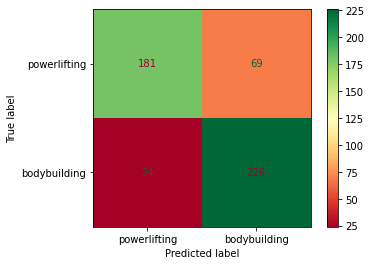

In [186]:
plot_confusion_matrix(gs_cvec_lr, X_test, y_test, display_labels=['powerlifting', 'bodybuilding'], cmap='RdYlGn');

#### CountVectorizer with KNeighbors Score

In [121]:
print(f'The train data score is:{gs_cvec_knn.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_knn.score(X_test,y_test)}')

The train data score is:0.9966666666666667
The test data score is:0.602


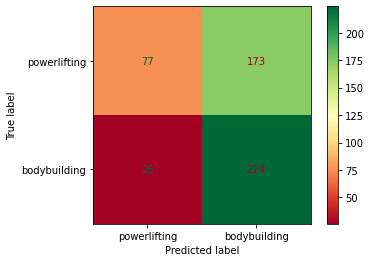

In [162]:
plot_confusion_matrix(gs_cvec_knn, X_test, y_test, display_labels=['powerlifting', 'bodybuilding'], cmap='RdYlGn');

#### CountVectorizer with MultinomialNB Score

In [122]:
print(f'The train data score is:{gs_cvec_nb.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_nb.score(X_test,y_test)}')

The train data score is:0.8846666666666667
The test data score is:0.806


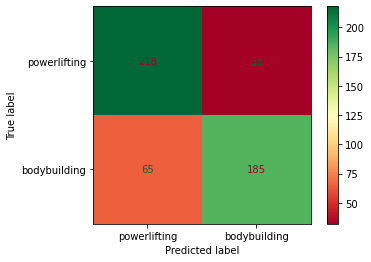

In [165]:
plot_confusion_matrix(gs_cvec_nb, X_test, y_test, display_labels=['powerlifting', 'bodybuilding'], cmap='RdYlGn');

#### CountVectorizer with RandomForest Score

In [123]:
print(f'The train data score is:{gs_cvec_rf.score(X_train,y_train)}')
print(f'The test data score is:{gs_cvec_rf.score(X_test,y_test)}')

The train data score is:0.9906666666666667
The test data score is:0.76


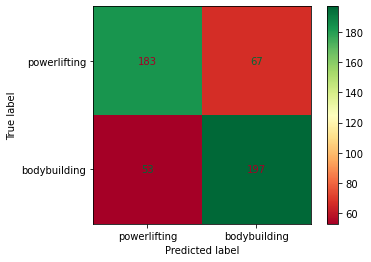

In [166]:
plot_confusion_matrix(gs_cvec_rf, X_test, y_test, display_labels=['powerlifting', 'bodybuilding'], cmap='RdYlGn');

## *The best performing model with the CountVectorizer is the LogisticRegression Model*

In [172]:
print(f'The best performing CountVectorizer model train data score is:{gs_cvec_lr.score(X_train,y_train)}')
print(f'The best performing CountVectorizer model test data score is:{gs_cvec_lr.score(X_test,y_test)}')

The best performing CountVectorizer model train data score is:0.9653333333333334
The best performing CountVectorizer model test data score is:0.814


---

#### TfidfVectorizer with LogisticRegression Score

In [124]:
print(f'The train data score is:{gs_tvec_lr.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_lr.score(X_test,y_test)}')

The train data score is:0.9473333333333334
The test data score is:0.816


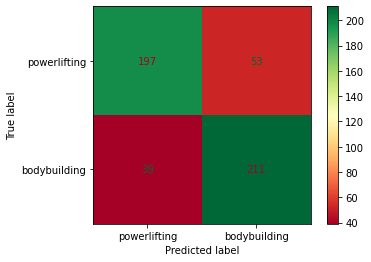

In [167]:
plot_confusion_matrix(gs_tvec_lr, X_test, y_test, display_labels=['powerlifting', 'bodybuilding'], cmap='RdYlGn');

#### TfidfVectorizer with KNeighbors Score

In [125]:
print(f'The train data score is:{gs_tvec_knn.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_knn.score(X_test,y_test)}')

The train data score is:0.9873333333333333
The test data score is:0.524


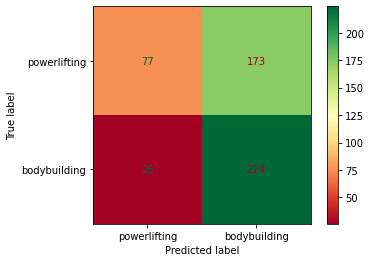

In [168]:
plot_confusion_matrix(gs_cvec_knn, X_test, y_test, display_labels=['powerlifting', 'bodybuilding'], cmap='RdYlGn');

#### TfidfVectorizer with MultinomialNB Score

In [126]:
print(f'The train data score is:{gs_tvec_nb.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_nb.score(X_test,y_test)}')

The train data score is:0.922
The test data score is:0.798


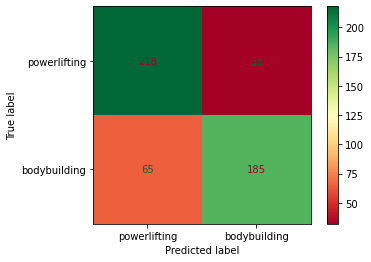

In [169]:
plot_confusion_matrix(gs_cvec_nb, X_test, y_test, display_labels=['powerlifting', 'bodybuilding'], cmap='RdYlGn');

#### TfidfVectorizer with RandomForest Score

In [127]:
print(f'The train data score is:{gs_tvec_rf.score(X_train,y_train)}')
print(f'The test data score is:{gs_tvec_rf.score(X_test,y_test)}')

The train data score is:0.9886666666666667
The test data score is:0.764


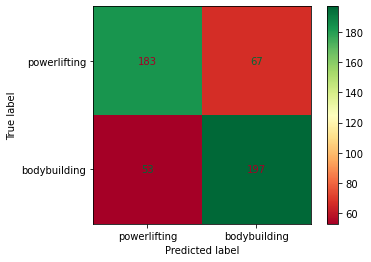

In [170]:
plot_confusion_matrix(gs_cvec_rf, X_test, y_test, display_labels=['powerlifting', 'bodybuilding'], cmap='RdYlGn');

#### *The best performing models with each transformers are:*

##### CountVectorizer with LogisticRegression

In [181]:
print(f'The best performing CountVectorizer model train data score is:{gs_cvec_lr.score(X_train,y_train)}')
print(f'The best performing CountVectorizer model test data score is:{gs_cvec_lr.score(X_test,y_test)}')

The best performing CountVectorizer model train data score is:0.9653333333333334
The best performing CountVectorizer model test data score is:0.814


##### TfidfVectorizer with LogisticRegression

In [182]:
print(f'The best performing TfidfVectorizer model train data score is:{gs_tvec_lr.score(X_train,y_train)}')
print(f'The best performing TfidfVectorizer model test data score is:{gs_tvec_lr.score(X_test,y_test)}')

The best performing TfidfVectorizer model train data score is:0.9473333333333334
The best performing TfidfVectorizer model test data score is:0.816
